### Agenda
1. Homework 2: [Kaggle Competition](https://docs.google.com/document/d/1ctW62_-hncYeahdhdQRBqAwauI10O1gVcqKX1b1KZs4/edit?usp=sharing)
2. Some Public Datasets: [Google dataset search](https://toolbox.google.com/datasetsearch), [NYC Open Data](https://data.cityofnewyork.us/browse), [Data.gov](https://catalog.data.gov/dataset), [UN Data](http://data.un.org/), [Quandle](https://www.quandl.com/), [MovieLens](https://grouplens.org/datasets/movielens/), [Quora's meta list of datasets](https://www.quora.com/Data/Where-can-I-find-large-datasets-open-to-the-public)
3. SKlearn
    1. Dimensionality Reduction: PCA 
    2. Clustering: K-means (DS4biz p.169 - 173)

### 3 (A): Dimensionality Reduction with PCA
[SKlearn PCA Documents](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) <br>
[Learn more about the seedsdataset](https://archive.ics.uci.edu/ml/index.php)

In [24]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [21]:
# Load seedsdataset.csv
df = pd.read_csv('seedsdataset.csv')
df.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,wheat_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [25]:
#turn dataframe into Numpy Array with shape (n_samples, n_features)
df_feat = df.drop(['wheat_variety'], 1)
X = df_feat.values
X.shape

(210, 7)

In [37]:
#load sklearn pca, reduce dimension from 7 to 3
pca = PCA(n_components=3)

#project
X_proj = pca.fit_transform(X)

#check shape
X_proj.shape

In [39]:
#explained variance by each principal directions
pca.explained_variance_ratio_

array([0.8293852 , 0.16363245, 0.00565791])

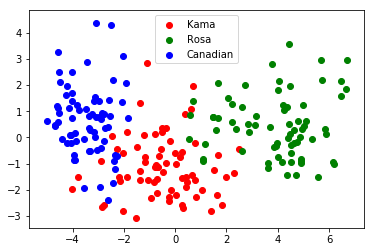

In [62]:
#plot 

import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue']
cls = ['Kama', 'Rosa', 'Canadian']

for i in range(len(cls)):
    ix = np.where(df['wheat_variety'].values == i + 1)
    plt.scatter(X_proj[ix, 0], X_proj[ix, 1], c = colors[i] , label = cls[i])
plt.legend()

### 3 (B): Clustering with K-means 
[SKlearn K-means Documents](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html)

In [70]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [71]:
#decide number of clusters by inertia (the 'elbow' method)
#inertia: sum of squared distances to the closest centroid for all observations in the training set

num_cluster = []
inertia = []
for i in range(1,6):
    clf = KMeans(init='k-means++', n_clusters = i, n_init=10)
    clf.fit(X)
    num_cluster.append(i)
    inertia.append(clf.inertia_)

#plot
plt.plot(num_cluster, inertia)

In [77]:
chosen_clusters
clf = KMeans(init='k-means++', n_clusters = chosen_clusters, n_init=10)
clf.fit(X)
clf.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

Text(0.5,1,'K-means clustering; centroids are black crosses.')

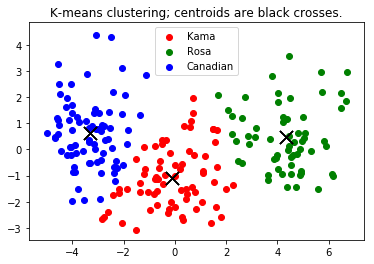

In [89]:
#plot k-means clustering results

## centroids
centroids = clf.cluster_centers_
centroids_proj = pca.transform(centroids)

## scatter plot

colors = ['red', 'green', 'blue']
cls = ['Kama', 'Rosa', 'Canadian']

for i in range(len(cls)):
    ix = np.where(clf.labels_ == i)
    plt.scatter(X_proj[ix, 0], X_proj[ix, 1], c = colors[i] , label = cls[i])
    plt.scatter(centroids_proj[:, 0], centroids_proj[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10)

plt.legend()
plt.title('K-means clustering; centroids are black crosses.')

More Readings:<br>
[K-Means Clustering: From A-Z](https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a) <br>[In Depth: k-Means Clustering](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)